In [2]:
# import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
# import random

# from scipy.integrate import solve_ivp
# import torch 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# import pysindy as ps

## Высокий полином методом МНК

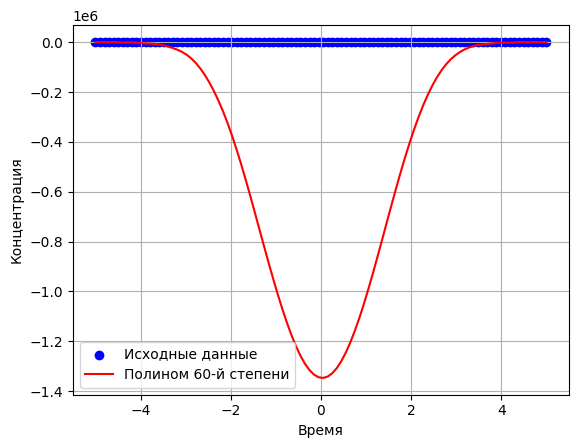

Коэффициенты полинома: [-1.34663100e+06 -2.51837694e+04  3.90266207e+05  7.13526794e+03
 -5.68140865e+04  3.74090150e+02  1.23149440e+04 -9.78594300e+02
 -3.76029617e+03  3.30034715e+02  7.33930099e+02 -3.81165801e+01
 -7.16179310e+01 -3.18593284e+00  9.31600347e-01  1.40368196e+00
  5.42713157e-01 -1.65293542e-01 -5.94655083e-02  9.43724938e-03
  2.86304094e-03 -3.07974752e-04 -7.67912130e-05  1.38473261e-05
  2.19056904e-06 -9.23209123e-07 -5.78941298e-08  2.41664013e-08
 -1.46820499e-09  5.89746577e-10 -7.11753850e-12 -4.07597996e-11
  9.29264781e-12  5.24507700e-13  4.26880245e-14  8.73035258e-15
 -2.71096572e-14  6.69427802e-16  2.99759274e-16 -9.58731613e-17
  3.21432183e-17  7.89866579e-19 -3.96865851e-20  5.47406274e-20
 -5.47602575e-20  4.79732951e-21  5.26565930e-22 -1.19028343e-22
 -1.78742349e-23 -4.14099516e-24  3.94871680e-24 -9.19943295e-26
 -3.38517587e-26  4.98844043e-27 -4.54900015e-27  1.23860958e-28
 -8.12858623e-30 -1.68275911e-30  6.01549096e-30 -5.25298183e-32
 -

In [6]:
# Данные: время (t) и концентрация (C)
t = np.linspace(-5, 5, 100)
C = np.array([i**2 for i in t])

# Выбираем степень полинома
degree = 60 # Например, квадратичная зависимость

# Формируем матрицу признаков для полиномиальной регрессии
X = np.vstack([t**i for i in range(degree + 1)]).T

# Вычисляем коэффициенты МНК
theta = np.linalg.inv(X.T @ X) @ X.T @ C

# Предсказание значений
# t_pred = np.linspace(min(t), max(t), 100)  # Генерируем новые точки для гладкости графика
t_pred = t
X_pred = np.vstack([t_pred**i for i in range(degree + 1)]).T
C_pred = X_pred @ theta

# Визуализация
plt.scatter(t, C, label="Исходные данные", color="blue")
plt.plot(t_pred, C_pred, label=f"Полином {degree}-й степени", color="red")
plt.xlabel("Время")
plt.ylabel("Концентрация")
plt.legend()
plt.grid()
plt.show()

# Вывод коэффициентов полинома 
print(f"Коэффициенты полинома: {theta}")


# Проверка Метода конечных разностей

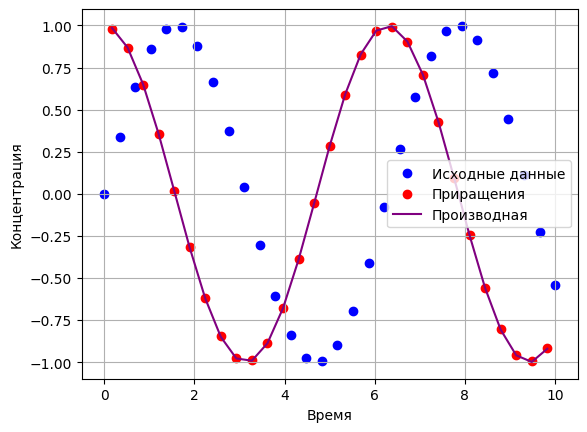

In [8]:
t = np.linspace(0, 10, 30)  # Временные точки
f = np.sin(t)  # Пример функции

h = t[1] - t[0]  # Шаг по времени
df_dt = np.diff(f) / h  # Приращения (разностная производная)

# df_dt получается длины 29, если нужно подстроить размерность:
t_mid = (t[:-1] + t[1:]) / 2  # Средние точки

# Производная
df = np.cos(t_mid)

# Визуализация
plt.scatter(t, f, label="Исходные данные", color="blue")
plt.scatter(t_mid, df_dt, label="Приращения", color="red")
plt.plot(t_mid, df, label="Производная", color="purple")
plt.xlabel("Время")
plt.ylabel("Концентрация")
plt.legend()
plt.grid()
plt.show()